In [ ]:
pip install pmdarima

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.matrics import mean_squared_error
from 

In [ ]:
import numpy as np
import pandas as pd
import plotly
import plotly.graph_objs as so
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima

In [ ]:
data=pd.read_excel('/content/final_dataset.xlsx')
data.head(2)

,Unnamed: 0,Participant No,Record Name,Gender,Smoking Status,BMI,Age,reading,Day1,Day2,Day3,Day4,Day5,Day6
0,0,1,301116B,M,Non-Smoker,21.7,20,"[93.4, 93.4, 93.4, 93.4, 93.4, 93.4, 93.4, 93....","[93.4, 93.4, 93.4, 93.4, 93.4, 93.4, 93.4, 93....","[93.4, 93.4, 93.4, 93.4, 93.4, 93.4, 93.4, 93....","[92.4, 92.4, 92.4, 92.4, 92.4, 92.4, 92.4, 92....","[93.4, 93.4, 93.4, 93.4, 93.4, 93.4, 93.4, 92....","[92.4, 92.4, 92.4, 92.4, 92.4, 92.4, 92.4, 92....","[93.4, 93.4, 93.4, 93.4, 93.4, 93.4, 93.4, 93...."
1,1,2,301116A,M,Non-Smoker,26.5,42,"[93.6, 93.6, 93.2, 92.5, 92.5, 92.5, 92.5, 92....","[93.6, 93.6, 93.2, 92.5, 92.5, 92.5, 92.5, 92....","[91.5, 91.5, 91.5, 91.5, 91.5, 91.5, 92.0, 92....","[93.6, 93.6, 93.6, 93.6, 93.6, 93.6, 93.6, 93....","[92.6, 92.6, 92.6, 92.6, 92.6, 92.6, 92.6, 92....","[91.5, 91.5, 91.5, 91.5, 91.5, 91.5, 91.5, 92....","[92.6, 92.6, 92.6, 92.6, 92.6, 92.6, 92.6, 92...."


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      36 non-null     int64  
 1   Participant No  36 non-null     int64  
 2   Record Name     36 non-null     object 
 3   Gender          36 non-null     object 
 4   Smoking Status  36 non-null     object 
 5   BMI             36 non-null     float64
 6   Age             36 non-null     int64  
 7   reading         36 non-null     object 
 8   Day1            36 non-null     object 
 9   Day2            36 non-null     object 
 10  Day3            36 non-null     object 
 11  Day4            36 non-null     object 
 12  Day5            36 non-null     object 
 13  Day6            36 non-null     object 
dtypes: float64(1), int64(3), object(10)
memory usage: 4.1+ KB


In [ ]:
data.isnull().sum()

Unnamed: 0        0
Participant No    0
Record Name       0
Gender            0
Smoking Status    0
BMI               0
Age               0
reading           0
Day1              0
Day2              0
Day3              0
Day4              0
Day5              0
Day6              0
dtype: int64

In [ ]:
data.describe()

,Unnamed: 0,Participant No,BMI,Age
count,36.000000,36.000000,36.000000,36.000000
mean,17.500000,18.500000,23.136111,33.888889
std,10.535654,10.535654,2.756411,16.099295
min,0.000000,1.000000,17.900000,19.000000
25%,8.750000,9.750000,20.675000,20.750000
50%,17.500000,18.500000,23.400000,23.000000
75%,26.250000,27.250000,24.625000,45.000000
max,35.000000,36.000000,28.400000,70.000000


In [ ]:
print("Number of Readings",len(data['reading'][0]))
print("Number of Readings in Day 1",len(data['Day1'][0]))
print("Number of Readings in Day 2",len(data['Day2'][0]))
print("Number of Readings in Day 3",len(data['Day3'][0]))
print("Number of Readings in Day 4",len(data['Day4'][0]))
print("Number of Readings in Day 5",len(data['Day5'][0]))
print("Number of Readings in Day 6",len(data['Day6'][0]))

Number of Readings 21642
Number of Readings in Day 1 3606
Number of Readings in Day 2 3606
Number of Readings in Day 3 3606
Number of Readings in Day 4 3606
Number of Readings in Day 5 3606
Number of Readings in Day 6 3612


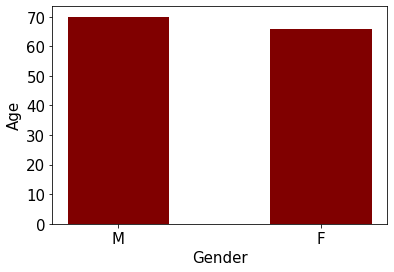

In [ ]:
# plt.figure(figsize=(16, 10))
plt.bar(data['Gender'], data['Age'],color='maroon',width=0.5)
# plt.title('')
plt.xlabel('Gender',size=15)
plt.ylabel('Age',size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


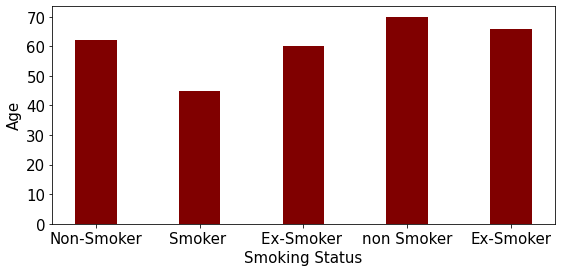

In [ ]:
plt.figure(figsize=(9, 4))
plt.bar(data['Smoking Status'], data['Age'],color='maroon',width=0.4)
# plt.title('')
plt.xlabel('Smoking Status',size=15)
plt.ylabel('Age',size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


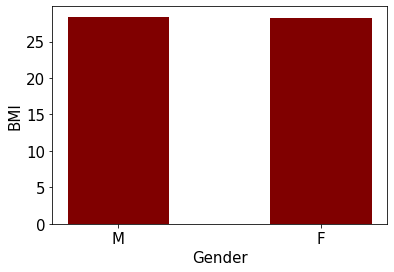

In [ ]:
# plt.figure(figsize=(16, 10))
plt.bar(data['Gender'], data['BMI'],color='maroon',width=0.5)
# plt.title('')
plt.xlabel('Gender',size=15)
plt.ylabel('BMI',size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


Text(0.5, 0, 'BMI Count')

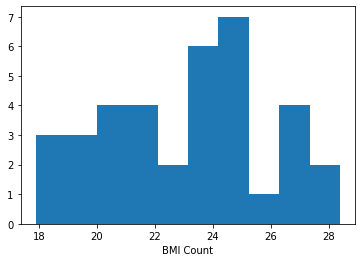

In [ ]:
plt.hist(data['BMI'],bins=10)
plt.xlabel('BMI Count')

In [ ]:
def forecast_pre_series(participant_no):
  rows = data.shape[0]
  participant_no = 1
  all_reading = eval(data['reading'][data['Participant No']==participant_no].tolist()[0])
  readings_length = len(all_reading)
  readings_split_length = int(readings_length / 6)
  last_day_times = len(all_reading[5*readings_split_length:])
  times_index_pre = []
  for i in range(1,8):
    if i<=6:
      index = pd.date_range(start=f'2020-11-0{i}',periods=readings_split_length, freq='1min')
    elif i == 6:
      index = pd.date_range(start=f'2020-11-0{i}',periods=last_day_times, freq='1min')
    else:
      index = pd.date_range(start=f'2020-11-0{i}',periods=6, freq='1min')
    
    times_index_pre.append(index)
  
  fore_place_holder = [0,0,0,0,0]
  all_reading = all_reading + fore_place_holder
  combined = times_index_pre[0].union(times_index_pre[1]).union(times_index_pre[2]).union(times_index_pre[3]).union(times_index_pre[4]).union(times_index_pre[5])
  final_pre_series = pd.Series(all_reading, index =combined)
  return final_pre_series, last_day_times

In [ ]:
final_pre_series[-10:]

NameError: ignored

In [ ]:
from datetime import datetime, timedelta

def prep_data(participant_no):
  pre_series,last_day_length = forecast_pre_series(participant_no)
  train_set = pre_series[:-607-5]
  valid_set = pre_series[-607-5:-5]
  test_set = pre_series[-607-5:]
  y_pred = test_set.copy()

  return train_set, valid_set, test_set, y_pred

In [ ]:
y_pred

NameError: ignored

In [ ]:
plt.subplot(3,2,1)
labels()
plt.title('Days1')
plt.plot(x1, y1, label = 'Day1')
plt.axhline(y = 90,color = 'r', linestyle = '--')

plt.subplot(3,2,2)
labels()
plt.title('Days2')
plt.plot(x2, y2, label = 'Day2')
plt.axhline(y = 90, color = 'r', linestyle = '--')

plt.subplot(3,2,3)
plt.ylabel('SpO2')
plt.title('Days3')
plt.plot(x3, y3, label = 'Day3')
plt.axhline(y = 90, color = 'r', linestyle = '--')

plt.subplot(3,2,4)
# labels()
plt.title('Days4')
plt.plot(x4, y4, label = 'Day4')
plt.axhline(y = 90,color = 'r',linestyle = '--')

plt.subplot(3,2,5)
labels()
plt.title('Days5')
plt.plot(x5, y5, label = 'Day5')
plt.axhline(y = 90, color = 'r', linestyle = '--')

plt.subplot(3,2,6)
plt.xlabel('seconds')
plt.title('Days6')
plt.plot(x6, y6, label = 'Day6')
plt.axhline(y = 90, color = 'r', linestyle = '--')

In [ ]:
plt_6days(32)

In [ ]:
def stat_values(day_number, days_reading):
  arr = np.array(days_reading)
  mean = round(np.mean(arr),2)
  median = np.median(arr)
  minim = np.amin(arr)
  maxim = np.amax(arr)
  std_dev = round(np.std(arr),2)
  return [day_number, mean, median, minim, maxim, std_dev]

In [ ]:
def get_stats(participant_no):
  complete_stat = []
  for i in range(1,7):
    complete_stat.append(stat_values(i,eval(data['Day'+str(i)][data['Participant No']==participant_no].tolist()[0])))
  stats = pd.DataFrame(complete_stat, columns = ['Day_number', 'mean', 'median', 'minimum', 'maximum', 'deviation'])
  print(stats)
  return stats

In [ ]:
def label(title='', xaxis='',yaxis=''):
  return plt.title(title), plt.xlabel(xaxis), plt.ylabel(yaxis)
def stat_plots(stats):
  plt.figure(figsize = [12,8])

  plt.subplot(221)
  plt.plot(stats['Day_number'], stats['mean'])
  label('mean', '', 'SpO2 level')

  plt.subplot(222)
  plt.plot(stats['Day_number'], stats['median'])
  label('median', '', '')

  plt.subplot(223)
  plt.plot(stats['Day_number'], stats['minimun'])
  label('minimum', 'days', 'SpO2 level')

  plt.subplot(224)
  plt.plot(stats['Day_number'], stats['maximum'])
  label('maximum', 'days', 'SpO2 level')

In [ ]:
participant_no = 1
stats = get_stats(participant_no)
stat_plots(stats)